In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0

In [4]:
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [5]:
model = Sequential([
Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
MaxPooling2D((2, 2)),
Conv2D(64, (3, 3), activation='relu'),MaxPooling2D((2, 2)),
Conv2D(64, (3, 3), activation='relu'),
Flatten(),
Dense(64, activation='relu'),
Dense(10, activation='softmax')])

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val,y_val))

Epoch 1/10


844/844 [==============================] - 16s 17ms/step - loss: 0.5770 - accuracy: 0.7884 - val_loss: 0.3894 - val_accuracy: 0.8585
Epoch 2/10
844/844 [==============================] - 16s 19ms/step - loss: 0.3520 - accuracy: 0.8735 - val_loss: 0.3348 - val_accuracy: 0.8783
Epoch 3/10
844/844 [==============================] - 15s 17ms/step - loss: 0.3019 - accuracy: 0.8899 - val_loss: 0.2933 - val_accuracy: 0.8917
Epoch 4/10
844/844 [==============================] - 15s 17ms/step - loss: 0.2706 - accuracy: 0.9010 - val_loss: 0.2795 - val_accuracy: 0.9000
Epoch 5/10
844/844 [==============================] - 15s 17ms/step - loss: 0.2498 - accuracy: 0.9078 - val_loss: 0.2794 - val_accuracy: 0.8998
Epoch 6/10
844/844 [==============================] - 14s 17ms/step - loss: 0.2265 - accuracy: 0.9174 - val_loss: 0.2674 - val_accuracy: 0.9038
Epoch 7/10
844/844 [==============================] - 15s 17ms/step - loss: 0.2100 - accuracy: 0.9227 - val_loss: 0.2538 - val_accurac

In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

313/313 [==============================] - 2s 5ms/step - loss: 0.2653 - accuracy: 0.9077
Test Accuracy: 90.77%


In [9]:
model.save('fashion_model.keras')

In [10]:
from tensorflow.keras.models import load_model
loaded_model = load_model('fashion_model.keras')

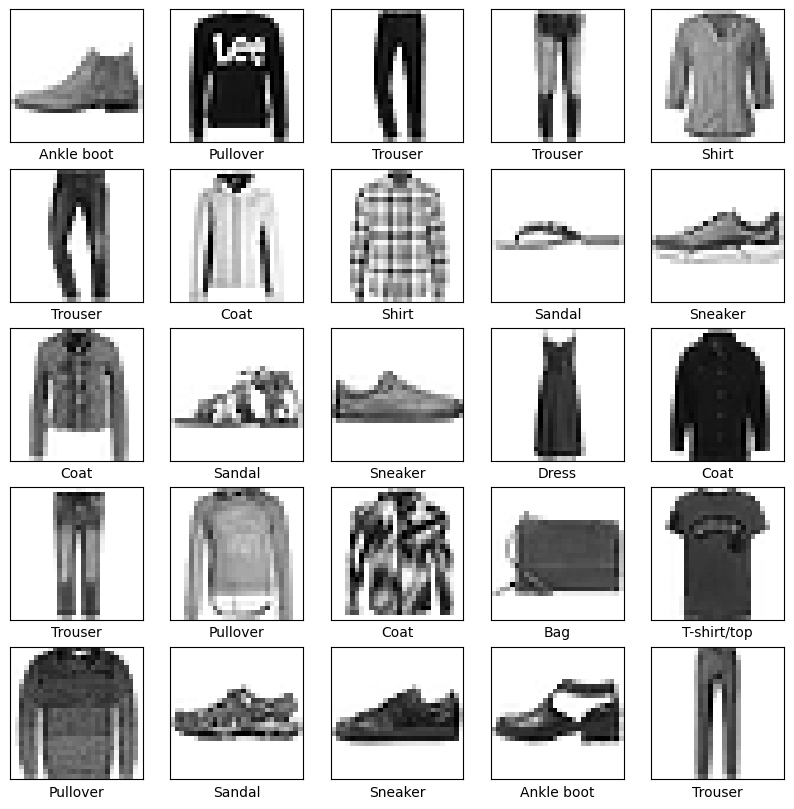

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(fashion_labels[y_test[i]])
plt.show()

In [25]:
#Make predictions on new data
# Example input for prediction
sample_image = X_test[5:6]
# Predict the class probabilities
predicted_probabilities = loaded_model.predict(sample_image)
# Get the index of the class with the highest probability
predicted_class_index = np.argmax(predicted_probabilities)
# Define the fashion category labels
fashion_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
# Convert the predicted class index to the corresponding fashion category label
predicted_label = fashion_labels[predicted_class_index]
print(f"The predicted clothing category is: {predicted_label}")

1/1 [==============================] - 0s 34ms/step
The predicted clothing category is: Trouser


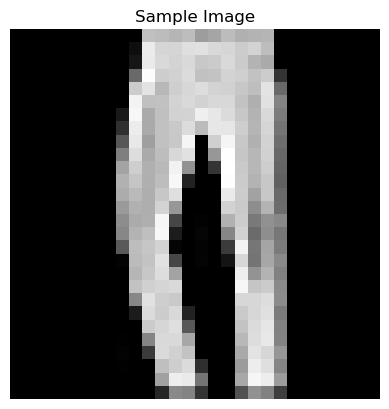

In [23]:
# Visualize the sample image
import matplotlib.pyplot as plt
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.title("Sample Image")
plt.show()